In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [2]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\acer\Desktop\potato disease\datasets


## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [3]:
import tensorflow as tf

# Correct the path with a raw string or double backslashes
train_path = r"C:\Users\acer\Desktop\potato disease\datasets"

# Load dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

print("Dataset loaded successfully!")


Found 599 files belonging to 3 classes.
Dataset loaded successfully!


In [4]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 599 files belonging to 3 classes.


In [5]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Test', 'Train', 'Valid']


In [6]:
valid_path = "c:\\Users\\acer\\Desktop\\potato disease\\datasets\\dataset\\Valid"


In [7]:
import os

valid_path = r"c:\Users\acer\Desktop\potato disease\datasets\dataset\Valid"

if not os.path.exists(valid_path):
    print(f"Directory not found: {valid_path}")
else:
    print("Directory exists. Proceeding with dataset loading.")


Directory not found: c:\Users\acer\Desktop\potato disease\datasets\dataset\Valid


In [8]:
import os

valid_path = r"c:\Users\acer\Desktop\potato disease\datasets\dataset\Valid"

if not os.path.exists(valid_path):
    print(f"Error: Directory not found -> {valid_path}")
else:
    print("Directory exists. Proceeding with dataset loading.")


Error: Directory not found -> c:\Users\acer\Desktop\potato disease\datasets\dataset\Valid


In [9]:
import tensorflow as tf

valid_path = r"C:\Users\acer\Desktop\potato disease\datasets\Valid"

# Verify directory exists
if not os.path.exists(valid_path):
    raise FileNotFoundError(f"Error: Directory not found -> {valid_path}")

# Load dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory=valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

print("Dataset loaded successfully!")


Found 300 files belonging to 3 classes.
Dataset loaded successfully!


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [11]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4434 - loss: 1.1913 - val_accuracy: 0.3367 - val_loss: 1.7621
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5214 - loss: 0.7175 - val_accuracy: 0.3333 - val_loss: 2.4687
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.5030 - loss: 0.7333 - val_accuracy: 0.3333 - val_loss: 1.8969
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5098 - loss: 0.7211 - val_accuracy: 0.3333 - val_loss: 2.2794
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.5417 - loss: 0.7039 - val_accuracy: 0.3333 - val_loss: 2.0415
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5147 - loss: 0.7138 - val_accuracy: 0.3267 - val_loss: 1.9998
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5268 - loss: 0.7063 - val_accuracy: 0.3433 - val_loss: 2.3435
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.5720 - loss: 0.6870 - val_accuracy: 0.3000 - val_loss: 2.4378
Ep

In [15]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 542ms/step - accuracy: 0.5504 - loss: 0.6831
Training accuracy: 0.5509182214736938


In [16]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 536ms/step - accuracy: 0.3700 - loss: 2.2415
Validation accuracy: 0.33000001311302185


In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history

{'accuracy': [0.4824707806110382,
  0.5108514428138733,
  0.4974958300590515,
  0.5091819763183594,
  0.5258764624595642,
  0.48580968379974365,
  0.5191986560821533,
  0.5325542688369751,
  0.542570948600769,
  0.5592654347419739],
 'loss': [0.9334050416946411,
  0.7134894728660583,
  0.7346155643463135,
  0.7186217308044434,
  0.711741030216217,
  0.7209909558296204,
  0.7076113224029541,
  0.6954231262207031,
  0.6905312538146973,
  0.6889190673828125],
 'val_accuracy': [0.33666667342185974,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3266666531562805,
  0.34333333373069763,
  0.30000001192092896,
  0.28333333134651184,
  0.33000001311302185],
 'val_loss': [1.762109637260437,
  2.4686567783355713,
  1.8968744277954102,
  2.2794058322906494,
  2.041473388671875,
  1.9997727870941162,
  2.3434829711914062,
  2.437793493270874,
  2.524160623550415,
  2.476015567779541]}

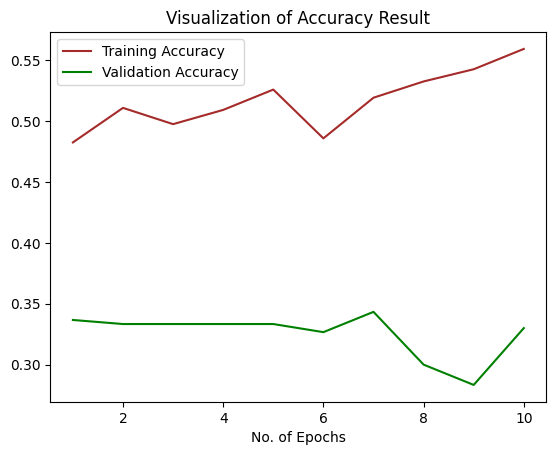

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()